<a href="https://colab.research.google.com/github/DavidRetamozo/Proyecto-Final-Data-Science-II/blob/main/Proyecto_Final_Ventas_Ecommerce__DavidRetamozo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Final - Ventas Ecommerce - David Retamozo

# Ventas Ecommerce



---
**Abstracto con Motivación y Audiencia**

Este análisis busca explorar patrones en los datos de compras de clientes para identificar factores que influyen en la venta por genero y edad. La motivación principal es optimizar estrategias comerciales y mejorar la experiencia del cliente.

**La audiencia objetivo**

incluye analistas de datos, equipos de marketing y directivos interesados en la toma de decisiones basada en datos.

**Contexto Comercial y Analítico**
El dataset incluye información sobre compras de clientes, categorizada por fecha, monto, tipo de producto, método de pago, devoluciones y datos demográficos. Este contexto comercial permite evaluar la relación entre el comportamiento de compra y la deserción de clientes (churn). Desde una perspectiva analítica, se utilizarán técnicas de correlación y visualización de datos.

**Preguntas/Hipótesis a Resolver mediante el Análisis de Datos**

¿Cuáles son las principales características de los clientes que abandonan el servicio (churn)?


**Objetivo**
El objetivo principal de este análisis es identificar los factores clave que influyen en la retención de clientes y optimizar estrategias comerciales basadas en evidencia. A través del análisis de datos, se espera generar recomendaciones accionables para mejorar la experiencia del cliente, reducir el churn y aumentar la rentabilidad del negocio.


---



###Presentación ejecutiva

https://drive.google.com/drive/folders/15zL5BNY-BaaEoihB8I1bIggHKGCJdAx_?usp=sharing

In [ ]:
# Librerias
from google.colab import files
import numpy as np
import pandas as pd
import io
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import trim_mean
from scipy.stats import norm
from scipy import stats

In [ ]:
# Cargamos el excel
df= pd.read_excel('/content/Datos_Eccomerce.xlsx')



In [ ]:
df.shape

(250000, 13)

In [ ]:
#5 primeros
df.head(5)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [ ]:
#5 aleatorios
df.sample(5)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
237985,27457,2023-06-18 11:05:27,Home,445,2,5180,Cash,50,NaN,Lindsay Cuevas,50,Male,0
52007,28891,2021-02-14 04:19:47,Home,347,2,487,Cash,19,0.0,Julia Ramirez,19,Male,0
187534,46620,2023-03-18 08:13:23,Home,401,2,1126,Cash,47,0.0,Ashley Russell,47,Male,0
145482,8177,2021-07-22 23:29:54,Home,106,5,1226,Credit Card,54,NaN,Julie Hawkins,54,Male,1
221346,27077,2023-04-14 03:40:29,Home,144,5,3609,Cash,41,1.0,Anthony Jones,41,Male,1


In [ ]:
#ultimos 5
df.tail()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
249995,33807,2023-01-24 12:32:18,Home,436,1,3664,Cash,63,0.0,Gabriel Williams,63,Male,0
249996,20455,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,66,1.0,Barry Foster,66,Female,0
249997,28055,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,63,NaN,Lisa Johnson,63,Female,0
249998,15023,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,64,1.0,Melissa Fernandez,64,Male,0
249999,4148,2020-09-07 05:12:19,Home,307,5,3634,Cash,32,0.0,Angela Norton,32,Male,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            250000 non-null  int64         
 1   Purchase Date          250000 non-null  datetime64[ns]
 2   Product Category       250000 non-null  object        
 3   Product Price          250000 non-null  int64         
 4   Quantity               250000 non-null  int64         
 5   Total Purchase Amount  250000 non-null  int64         
 6   Payment Method         250000 non-null  object        
 7   Customer Age           250000 non-null  int64         
 8   Returns                202618 non-null  float64       
 9   Customer Name          250000 non-null  object        
 10  Age                    250000 non-null  int64         
 11  Gender                 250000 non-null  object        
 12  Churn                  250000 non-null  int6

In [ ]:
df['Purchase Date'] = df['Purchase Date'].dt.strftime('%Y-%m')


Se repite la columna Edad, borramos una

In [ ]:
df.drop(columns=['Age'], inplace=True)


In [ ]:
df.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Gender', 'Churn'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,250000.0,25017.632092,14412.515718,1.0,12590.0,25011.0,37441.25,50000.0
Product Price,250000.0,254.742724,141.738104,10.0,132.0,255.0,377.00,500.0
Quantity,250000.0,3.004936,1.414737,1.0,2.0,3.0,4.00,5.0
Total Purchase Amount,250000.0,2725.385196,1442.576095,100.0,1476.0,2725.0,3975.00,5350.0
Customer Age,250000.0,43.798276,15.364915,18.0,30.0,44.0,57.00,70.0
Returns,202618.0,0.500824,0.500001,0.0,0.0,1.0,1.00,1.0
Churn,250000.0,0.200520,0.400390,0.0,0.0,0.0,0.00,1.0


In [ ]:
# Renombrar las columnas
df = df.rename(columns={"Customer ID": "ClienteID", "Purchase Date": "Fecha de Compra", "Product Category": "Categoria",
                        "Product Price":"Precio","quantity":"Cantidad","Total Purchase Amount":"Importe Total",
                        "Payment Method":"Metodo de Pago","Customer Age":"EdadCliente","Returns":"Devoluciones",
                        "Customer Name":"NombreCliente","Gender":"Genero","Churn":"PerdidaCliente"})
df.head()

,ClienteID,Fecha de Compra,Categoria,Precio,Quantity,Importe Total,Metodo de Pago,EdadCliente,Devoluciones,NombreCliente,Genero,PerdidaCliente
0,44605,2023-05,Home,177,1,2427,PayPal,31,1.0,John Rivera,Female,0
1,44605,2021-05,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,Female,0
2,44605,2020-07,Books,413,1,2345,Credit Card,31,1.0,John Rivera,Female,0
3,44605,2023-01,Electronics,396,3,937,Cash,31,0.0,John Rivera,Female,0
4,44605,2021-05,Books,259,4,2598,PayPal,31,1.0,John Rivera,Female,0


**Descripción de variables**

**ClienteID:** Identificacion del cliente.

**Fecha de Compra:** Fecha en la que el cliente efectuo la compra.

**Categoria:** Categoria del producto vendido.

**Precio:** Precio del producto vendido.

**Quantity:** Cantidad de producto vendido.

**-importe Total:** Importe Total de los productos vendidos y/o devueltos.

**Metodo de Pago:** Metodo de pago de la compra efectuada.

**EdadCliente:** Edad del cliente.

**Devoluciones:** Devoluciones efectuadas.

**NombreCliente:** Nombre del cliente.

**Genero:** Genero del cliente que efectuo la compra.

**Perdidacliente:** Perdida del cliente.





In [ ]:
# Contar los valores nulos por columna
df.isnull().sum()

,0
ClienteID,0
Fecha de Compra,0
Categoria,0
Precio,0
Quantity,0
Importe Total,0
Metodo de Pago,0
EdadCliente,0
Devoluciones,47382
NombreCliente,0


<Axes: >

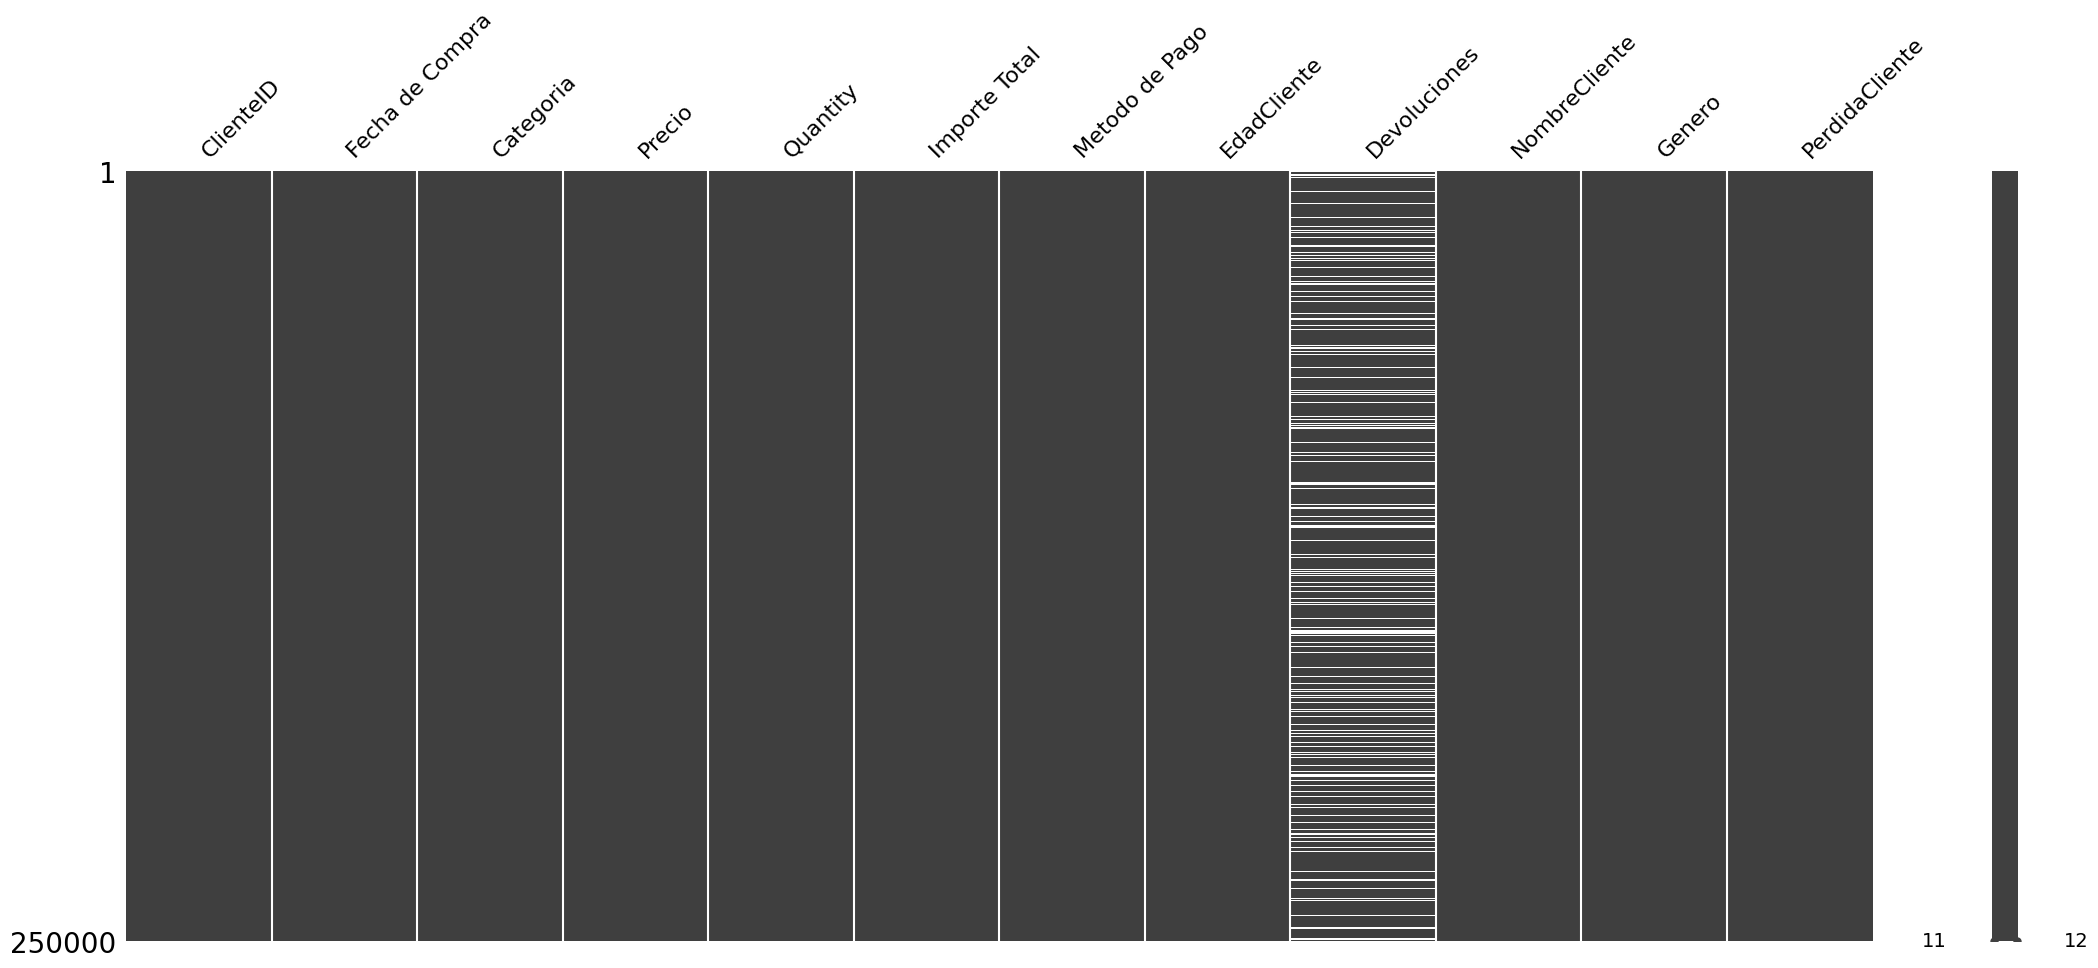

In [ ]:
msno.matrix(df)



---
El grafico muestra la cantidad de datos nulos del campo devoluciones, para poder efectuar calculos, reemplazaremos por cero a las celdas vacias


---



In [ ]:
# Reemplazar valores vacios por ceros
df['Devoluciones'] = pd.to_numeric(df['Devoluciones'], errors='coerce').fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ClienteID        250000 non-null  int64  
 1   Fecha de Compra  250000 non-null  object 
 2   Categoria        250000 non-null  object 
 3   Precio           250000 non-null  int64  
 4   Quantity         250000 non-null  int64  
 5   Importe Total    250000 non-null  int64  
 6   Metodo de Pago   250000 non-null  object 
 7   EdadCliente      250000 non-null  int64  
 8   Devoluciones     250000 non-null  float64
 9   NombreCliente    250000 non-null  object 
 10  Genero           250000 non-null  object 
 11  PerdidaCliente   250000 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 22.9+ MB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
zero = df == 0
zero.sum()

,0
ClienteID,0
Fecha de Compra,0
Categoria,0
Precio,0
Quantity,0
Importe Total,0
Metodo de Pago,0
EdadCliente,0
Devoluciones,148524
NombreCliente,0




---

Notamos que ambos campos, presentan valores de 0 y 1, por lo que se decide reemplazar a todos los 1 como efectuados ( segun el campo ) y cero como false

---



In [ ]:
df[['Devoluciones']] = df[['Devoluciones']].replace(0,"venta")
df[['Devoluciones']] = df[['Devoluciones']].replace(1, "Devolucion")
df[['PerdidaCliente']] = df[['PerdidaCliente']].replace(0, "Activo")
df[['PerdidaCliente']] = df[['PerdidaCliente']].replace(1, "Perdido")

In [ ]:
zero = df == 0
zero.sum()

,0
ClienteID,0
Fecha de Compra,0
Categoria,0
Precio,0
Quantity,0
Importe Total,0
Metodo de Pago,0
EdadCliente,0
Devoluciones,0
NombreCliente,0


In [ ]:
df

,ClienteID,Fecha de Compra,Categoria,Precio,Quantity,Importe Total,Metodo de Pago,EdadCliente,Devoluciones,NombreCliente,Genero,PerdidaCliente
0,44605,2023-05,Home,177,1,2427,PayPal,31,Devolucion,John Rivera,Female,Activo
1,44605,2021-05,Electronics,174,3,2448,PayPal,31,Devolucion,John Rivera,Female,Activo
2,44605,2020-07,Books,413,1,2345,Credit Card,31,Devolucion,John Rivera,Female,Activo
3,44605,2023-01,Electronics,396,3,937,Cash,31,venta,John Rivera,Female,Activo
4,44605,2021-05,Books,259,4,2598,PayPal,31,Devolucion,John Rivera,Female,Activo
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01,Home,436,1,3664,Cash,63,venta,Gabriel Williams,Male,Activo
249996,20455,2021-06,Electronics,233,1,4374,Credit Card,66,Devolucion,Barry Foster,Female,Activo
249997,28055,2022-11,Electronics,441,5,5296,Cash,63,venta,Lisa Johnson,Female,Activo
249998,15023,2021-06,Electronics,44,2,2517,Cash,64,Devolucion,Melissa Fernandez,Male,Activo


# **Análisis Univariado**

In [ ]:
media_importe = df['Importe Total'].mean()
mediana_importe = df['Importe Total'].median()
moda_importe = df['Importe Total'].mode()[0]
print("Media de Importe Total:", media_importe)
print("Mediana de Importe Total", mediana_importe)
print("Moda Importe Total", moda_importe)

Media de Importe Total: 2725.385196
Mediana de Importe Total 2725.0
Moda Importe Total 2533


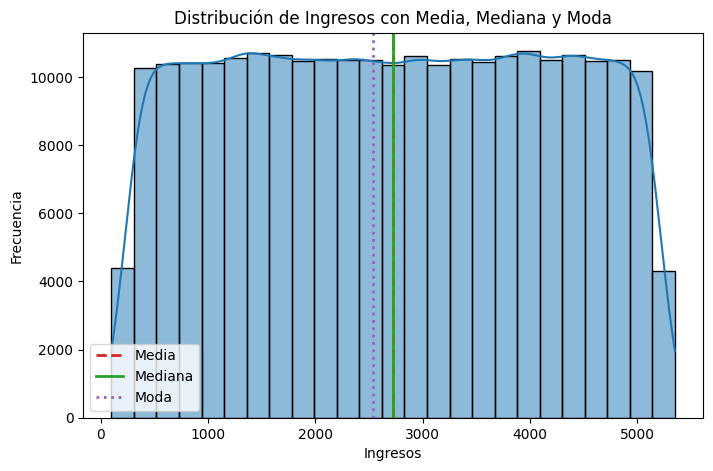

In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(8, 5))
sns.histplot(df['Importe Total'], kde=True, color='#1f77b4', bins=25)

# Añadir líneas verticales para la media, mediana y moda
plt.axvline(media_importe, color='#d62728', linestyle='--', linewidth=2, label='Media')
plt.axvline(mediana_importe, color='#2ca02c', linestyle='-', linewidth=2, label='Mediana')
plt.axvline(moda_importe, color='#9467bd', linestyle=':', linewidth=2, label='Moda')

# Etiquetas
plt.xlabel('Ingresos', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)

# Leyenda y título
plt.legend(fontsize=10)
plt.title('Distribución de Ingresos con Media, Mediana y Moda', fontsize=12)
plt.show()




---


La proximidad entre la media y la mediana sugiere que la distribución de los ingresos es bastante parecida. Sin embargo, la moda siendo diferente y menor a la media y mediana sugiere que hay una concentración de ingresos alrededor de 2533.


---



In [ ]:
# Cálculo de la curtosis

curtosis = stats.kurtosis(df['Importe Total'])

print(f'Curtosis: {curtosis}')

Curtosis: -1.1940256717593039


Una curtosis negativa indica una distribución platicúrtica, con colas ligeras


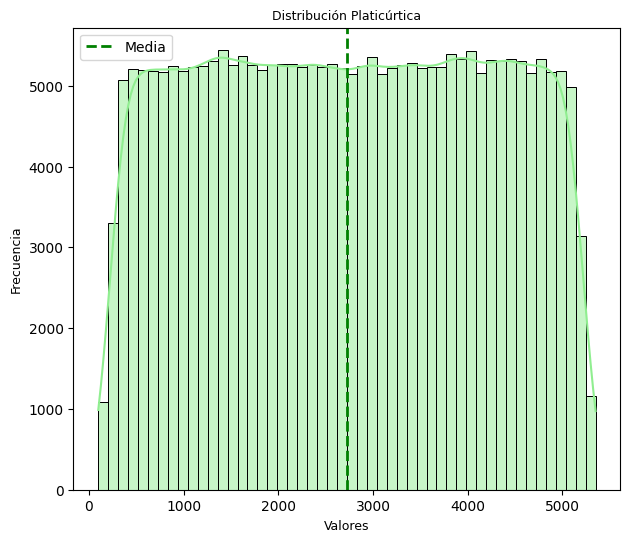

In [ ]:


# Gráfico de la distribución Platicúrtica
plt.figure(figsize=(24, 6))
plt.subplot(1, 3, 2)
sns.histplot(df['Importe Total'], kde=True, color='lightgreen', bins=50)
plt.axvline(df['Importe Total'].mean(), color='green', linestyle='--', linewidth=2, label='Media')
plt.title("Distribución Platicúrtica", fontsize=9)
plt.xlabel("Valores", fontsize=9)
plt.ylabel("Frecuencia", fontsize=9)
plt.legend()

plt.show()



---


En el eje horizontal, tenemos el rango de ingresos, desde los mas bajos a la izquierda hasta los mas altos a la derecha. En el eje vertical, tenemos la frecuencia, en donde nos indican cuantas veces se repiten ciertos valores de ingresos. Ahora, al mirar la fomra de la curva del grafico, notamos que es mas baja y mas ancha comparando con una curva normal. Significa entonces que los datos son mas dispersos, los valores no se agrupan en el centro.


---



###Rango, varianza y desviacion estandar

In [ ]:
# Cálculo del rango
rango = np.max(df['Importe Total']) - np.min(df['Importe Total'])
print("Rango:", rango)

# Cálculo de la varianza
varianza = np.var(df['Importe Total'])
print("Varianza:", varianza)

# Cálculo de la desviación estándar
desviacion_estandar = np.std(df['Importe Total'])
print("Desviación Estándar:", desviacion_estandar)

Rango: 5250
Varianza: 2081017.4649801175
Desviación Estándar: 1442.5732095738217




---


Un rango de 5250 sugiere que hay una enorme variabilidad entre el importe más alto y el más bajo en tus datos.
La varianza y desviación estándar, indican que hay una gran dispersión de los importes respecto a la media.


---



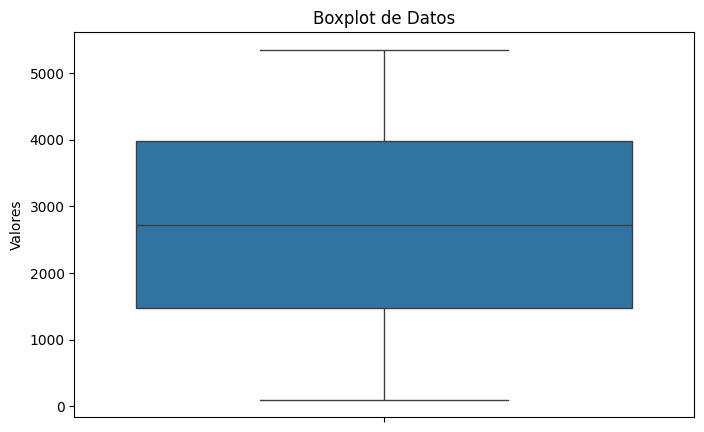

In [ ]:
# Creación del boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(df['Importe Total'])
plt.title("Boxplot de Datos")
plt.ylabel("Valores")
plt.show()

En el grafico boxplot de datos, podemos observar que los datos no poseen outliers

<ipython-input-28-aa70aac78418>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Categoria', order=df['Categoria'].value_counts().index, palette='Set1', width=0.6)


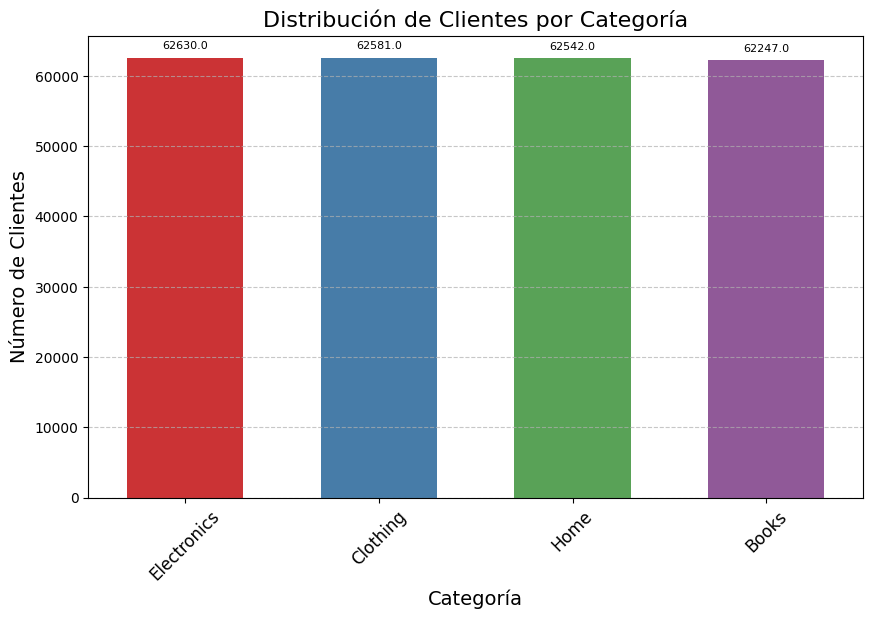

In [ ]:
plt.figure(figsize=(10, 6))

# Gráfico de conteo por categoría
ax = sns.countplot(data=df, x='Categoria', order=df['Categoria'].value_counts().index, palette='Set1', width=0.6)

# Agregar etiquetas encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Título y etiquetas
plt.title('Distribución de Clientes por Categoría', fontsize=16)
plt.xlabel('Categoría', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Grilla en el eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


---
La distribución de clientes por categoría es bastante pareja, con una diferencia mínima entre cada una. Esta distribución sugiere que el interés de  los clientes se reparte de forma casi equitativa entre las distintas categorías de productos, lo cual puede indicar una oferta balanceada,puede ser positivo desde el punto de vista de diversificación comercial.

---

# **Análisis Bivariado**

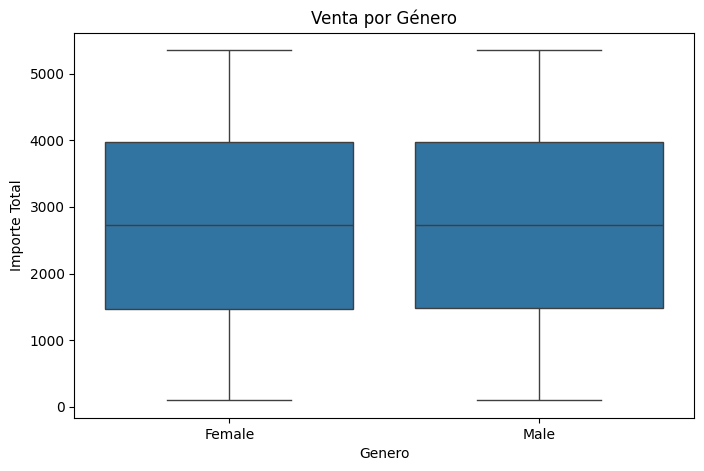

In [ ]:
# 1. Nominal vs. Intervalo: Boxplot de Peso por Género
plt.figure(figsize=(8, 5))
sns.boxplot(x='Genero', y='Importe Total', data=df)
plt.title('Venta por Género')

plt.show()

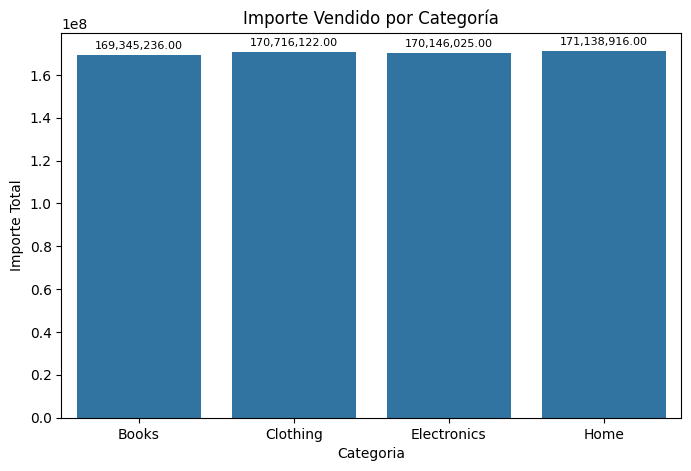

In [ ]:
# Calcular el importe por categoría
importe = df.groupby('Categoria')['Importe Total'].sum().reset_index()

plt.figure(figsize=(8, 5))

# Crear el gráfico y guardarlo en 'ax'
ax = sns.barplot(x='Categoria', y='Importe Total', data=importe)

# Agregar etiquetas encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 3),
                textcoords='offset points')

# Título del gráfico
plt.title('Importe Vendido por Categoría')

# Mostrar el gráfico
plt.show()




---

No existe diferencia significativa en las ventas entre categorias

---



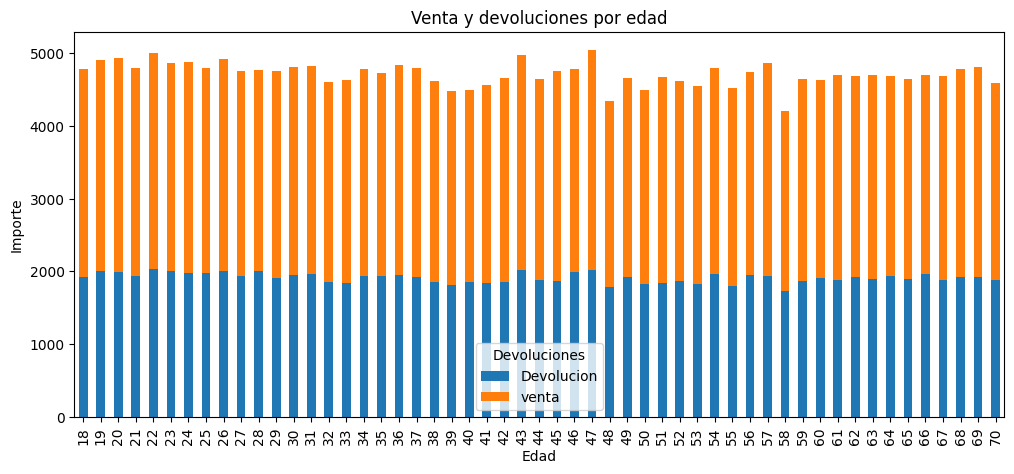

In [ ]:
satisfaccion_genero = df.groupby(['EdadCliente', 'Devoluciones']).size().unstack()
satisfaccion_genero.plot(kind='bar', stacked=True, figsize=(12, 5))
plt.title('Venta y devoluciones por edad')
plt.xlabel('Edad')
plt.ylabel('Importe')
plt.show()



---

La relacion entre venta y devolucion es estable, igualmente se nota mas devoluciones a los 20 y entre 43 - 47

---



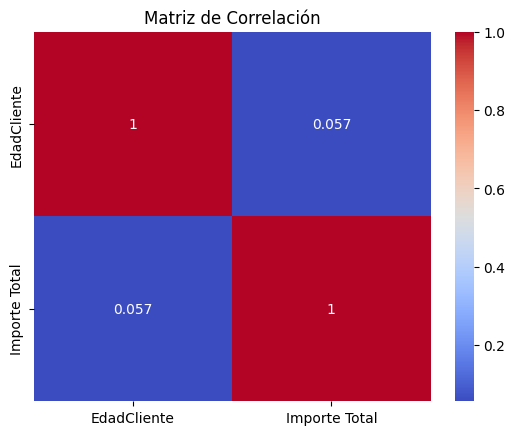

In [ ]:
# Matriz de correlación
df2 = df[['EdadCliente', 'Importe Total']]
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()



---
Esto significa que no hay una relación lineal significativa entre estas dos variables en el dataset. En otras palabras, la edad de los clientes no parece tener un impacto notable en el importe vendido


---




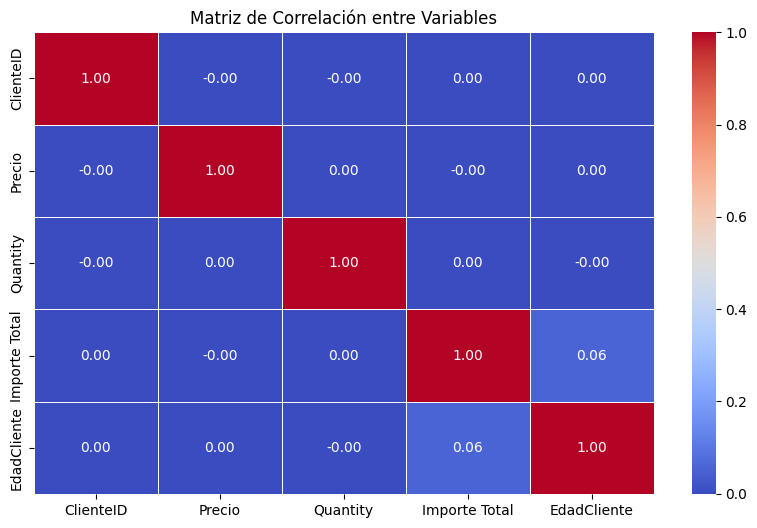

In [ ]:
corr_matrix = df.select_dtypes(include=['number']).corr()

# Graficar un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables")
plt.show()



---

No encontramos correlaciones entre variables

---



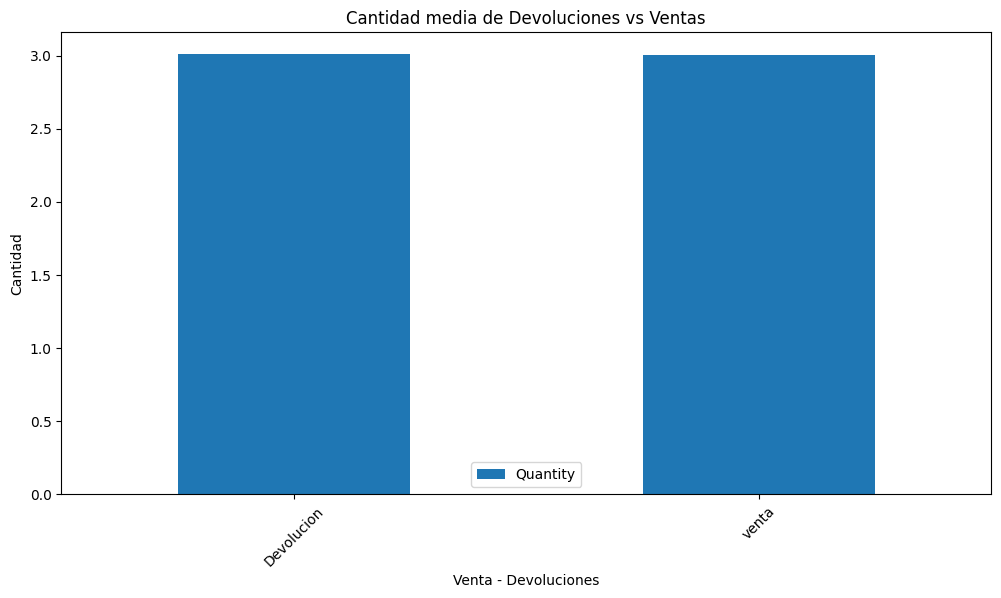

In [ ]:
avg_skills = df.groupby('Devoluciones')[['Quantity']].mean()
top= avg_skills.mean(axis=1).nlargest(10).index
top_avg_skills = avg_skills.loc[top]

top_avg_skills.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Cantidad media de Devoluciones vs Ventas')
plt.ylabel('Cantidad')
plt.xlabel('Venta - Devoluciones')
plt.xticks(rotation=45)
plt.show()

---


En nuestro dataset la media entre las ventas y las devoluciones son semejantes

---

# **Modelos**

Probaremos el modelo de RandomForest

###Librerias necesarias

In [ ]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, classification_report
)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV



In [ ]:
df.columns

Index(['ClienteID', 'Fecha de Compra', 'Categoria', 'Precio', 'Quantity',
       'Importe Total', 'Metodo de Pago', 'EdadCliente', 'Devoluciones',
       'NombreCliente', 'Genero', 'PerdidaCliente'],
      dtype='object')

###label encoding

In [ ]:
# Crear un objeto de LabelEncoder
encoder = LabelEncoder()

# Aplicar Label Encoding a columnas categóricas
df['Categoria'] = encoder.fit_transform(df['Categoria'])
df['Metodo de pago'] = encoder.fit_transform(df['Metodo de Pago'])
df['Genero'] = encoder.fit_transform(df['Genero'])

print(df)

        ClienteID Fecha de Compra  Categoria  Precio  Quantity  Importe Total  \
0           44605         2023-05          3     177         1           2427   
1           44605         2021-05          2     174         3           2448   
2           44605         2020-07          0     413         1           2345   
3           44605         2023-01          2     396         3            937   
4           44605         2021-05          0     259         4           2598   
...           ...             ...        ...     ...       ...            ...   
249995      33807         2023-01          3     436         1           3664   
249996      20455         2021-06          2     233         1           4374   
249997      28055         2022-11          2     441         5           5296   
249998      15023         2021-06          2      44         2           2517   
249999       4148         2020-09          3     307         5           3634   

       Metodo de Pago  Edad

###División de datos en conjuntos de entrenamiento y prueba

In [ ]:
# Seleccionar las características y la variable objetivo
X = df[["EdadCliente","Categoria","Metodo de Pago","Importe Total","Genero", "Devoluciones"]]
y = df["PerdidaCliente"]

X = pd.get_dummies(X, drop_first=True)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###Normalización y escalado

In [ ]:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

# Transformar el conjunto de prueba usando el scaler ajustado
X_test_scaled = scaler.transform(X_test)

# Convertir los arrays escalados a DataFrames para mantener el formato original (opcional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Datos de entrenamiento escalados:")
print(X_train_scaled.head())

print("Datos de prueba escalados:")
print(X_test_scaled.head())

Datos de entrenamiento escalados:
   EdadCliente  Categoria  Importe Total    Genero  \
0     1.444892   0.446392       0.902646 -1.005515   
1    -1.156581   1.341307       1.398107 -1.005515   
2     0.729487   1.341307      -0.457619  0.994515   
3     1.574965  -1.343437      -0.440988 -1.005515   
4     0.469339  -0.448522      -1.549019  0.994515   

   Metodo de Pago_Credit Card  Metodo de Pago_PayPal  Devoluciones_venta  
0                    1.412603              -0.708001           -1.209279  
1                   -0.707913              -0.708001            0.826939  
2                    1.412603              -0.708001            0.826939  
3                   -0.707913              -0.708001           -1.209279  
4                   -0.707913              -0.708001            0.826939  
Datos de prueba escalados:
   EdadCliente  Categoria  Importe Total    Genero  \
0    -0.050955   0.446392      -1.032077 -1.005515   
1     0.794524  -1.343437       1.441763  0.994515   
2 

In [ ]:
X_train=X_train_scaled
X_test=X_test_scaled

In [ ]:
# Entrenar un modelo (Random Forest como ejemplo)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

In [ ]:
# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
y_pred_proba = clf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1], average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

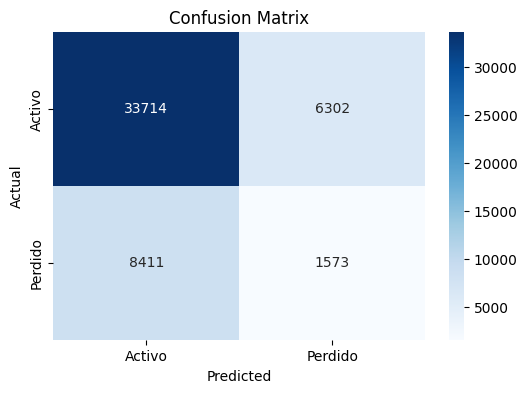

In [ ]:
# Mostrar matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Activo", "Perdido"], yticklabels=["Activo", "Perdido"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

---
De los 1,573 clientes que realmente estaban perdidos, el sistema cometió un error con 8,411. Esto parece indicar un problema de falsos negativos bastante elevado. En este contexto, los falsos negativos son casos en los que el modelo clasificó erróneamente a los clientes perdidos como activos

De los 33714 clientes realmente activos, el modelo tuvo 6302 errores. Esto significa que hay un número notable de falsos positivos, es decir, clientes activos clasificados incorrectamente como perdidos



### **Con el objetivo de optimizar los resultados y mejorar el rendimiento del modelo actual, Se procedera a evaluar otros algoritmos de clasificación**

In [ ]:


# Lista de modelos a evaluar
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

# Entrenamiento y evaluación de cada modelo
for model_name, model in models.items():
    print(f"Evaluando modelo: {model_name}")
    # Entrenar el modelo
    model.fit(X_train, y_train)
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)
    # Evaluar precisión y reporte de clasificación
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Evaluando modelo: Logistic Regression
Accuracy: 0.80032


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      Activo       0.80      1.00      0.89     40016
     Perdido       0.00      0.00      0.00      9984

    accuracy                           0.80     50000
   macro avg       0.40      0.50      0.44     50000
weighted avg       0.64      0.80      0.71     50000

--------------------------------------------------
Evaluando modelo: Decision Tree
Accuracy: 0.66956
              precision    recall  f1-score   support

      Activo       0.80      0.78      0.79     40016
     Perdido       0.20      0.21      0.21      9984

    accuracy                           0.67     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.68      0.67      0.67     50000

--------------------------------------------------
Evaluando modelo: Random Forest
Accuracy: 0.70574
              precision    recall  f1-score   support

      Activo       0.80      0.84      0.82     40016
     Perdido       0.20      0.16  

Conclusiones de los modelos implementados :
1.   Logistic Regression y Gradient Boosting:


*   Ambos modelos tienen una precisión general alta del 80%.
*   Sin embargo, el recall para la clase “Perdido” es 0, lo que indica que estos modelos no están identificando correctamente los clientes perdidos.


2.   Decision Tree


*   Tiene una precisión de aproximadamente 68%
*   Aunque algo mejor en la identificación de la clase "Perdido" con un recall del 21%, sigue siendo bastante limitado en su capacidad para identificar clientes perdidos. Aún necesita ajustes.


3.   Random Forest:


*   Con una precisión cercana al 69%, logra un balance similar al Decision Tree, identificando la clase "Perdido" con un recall del 18%. Este modelo tiene el potencial de capturar más detalles, pero probablemente requiere optimización adicional








###Conclusion :

###Es evidente que el modelo tiene problemas al predecir la clase "Perdido", para ello intentaremos optimizar el modelo

In [ ]:
# Definir el modelo y los parámetros aleatorios
model = LogisticRegression()
param_distributions = {
    "C": np.logspace(-3, 3, 10),
    "solver": ["liblinear", "lbfgs"],
    "max_iter": [100, 200, 300]
}

# Random Search con validación cruzada
random_search = RandomizedSearchCV(model, param_distributions, n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Resultados
print("Mejores hiperparámetros:", random_search.best_params_)
print("Mejor precisión:", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores hiperparámetros: {'solver': 'liblinear', 'max_iter': 100, 'C': np.float64(0.001)}
Mejor precisión: 0.7992699999999999


Se encontraron los parametros  que maximizan el rendimiento del modelo. Aunque la mejor precisión lograda (0.7992) no supera significativamente los resultados originales, el enfoque de ajuste de parámetros aún es crucial para garantizar que el modelo esté funcionando de manera óptima

###Concluciones Finales :

Se trabajo con datos desbalanceados donde la clase minoritaria, la clase 0, tiene una representación limitada. Esto puede llevar a modelos predictivos que no generalicen bien o que tengan un sesgo hacia la clase mayoritaria

*   Necesidad de recopilar más datos de la clase minoritaria: Es clave para equilibrar el conjunto de datos y mejorar el entrenamiento del modelo.


